In [324]:
import pandas as pd
data=pd.read_csv(r"C:\Users\Diptanu Sarkar\Desktop\Python\Titanic-Dataset.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [325]:
data.shape
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [326]:
q1 = data["Fare"].quantile(0.05)   # 5th percentile
q2 = data["Fare"].quantile(0.95)   # 95th percentile

# Keep only rows where Fare is between q1 and q3
data = data[(data["Fare"] > q1) & (data["Fare"] < q2)]


In [327]:
data.info()
data.isnull().sum()
data["Age"].fillna(data["Age"].mean(),inplace=True)
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 791 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  791 non-null    int64  
 1   Survived     791 non-null    int64  
 2   Pclass       791 non-null    int64  
 3   Name         791 non-null    object 
 4   Sex          791 non-null    object 
 5   Age          635 non-null    float64
 6   SibSp        791 non-null    int64  
 7   Parch        791 non-null    int64  
 8   Ticket       791 non-null    object 
 9   Fare         791 non-null    float64
 10  Cabin        163 non-null    object 
 11  Embarked     789 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 80.3+ KB


C:\Users\Diptanu Sarkar\AppData\Local\Temp\ipykernel_10868\3506186671.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(data["Age"].mean(),inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          628
Embarked         2
dtype: int64

In [328]:
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          628
Embarked         2
dtype: int64

In [329]:
data.drop("Cabin", axis=1, inplace=True)


In [330]:
# data.tail()
# data.shape
# data.isnull().sum()
# data.fillna("null")
data.iloc[0:2,2:5]
data.loc[[2,4],"Sex"]


2    female
4      male
Name: Sex, dtype: object

In [331]:
maxi=0
#  item():will iterate through each column. iterrows(): will iterate through each row
for i,row in data.iterrows(): 
    if row['Sex']=="male":
        var=row['Fare']
        maxi=max(var,maxi)
    if row['Fare']==maxi:
        name=row['Name']
           
print(maxi) 
print(name) 
dm=data.Fare.max()
data[(data["Sex"]=="male") & (data["Fare"]==dm)]["Name"]     

110.8833
Thayer, Mr. John Borland


550    Thayer, Mr. John Borland Jr
698       Thayer, Mr. John Borland
Name: Name, dtype: object

In [332]:
import pandas as pd
data=pd.read_csv(r"C:\Users\Diptanu Sarkar\Desktop\Python\Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [333]:
import pandas as pd
data=pd.read_csv(r"C:\Users\Diptanu Sarkar\Desktop\Python\Titanic-Dataset.csv")
a=0
na=0
data["family"] = data["SibSp"] + data["Parch"]
for i ,row in data.iterrows():
      if row.family==0 and row.Survived==1 :
            a+=1
      elif row.family>0 and row.Survived==1:
            na+=1      
print(f"survived alone: {a} and survived with family: {na}")



survived alone: 163 and survived with family: 179


In [334]:
alone=0
notalone=0
for i ,row in data.iterrows():
    if row.SibSp ==0 and row.Parch ==0 :
        alone+=1
    elif row.SibSp !=0 or row.Parch !=0:
        notalone+=1
print(f"died alone:{alone} and died with family:{notalone}")        

died alone:537 and died with family:354


In [335]:

cm=0
cf=0
for i,row in data.iterrows():
    if row.Sex == 'male':
        cm+=1
    elif row.Sex=="female":
        cf+=1    
        
print(f"male:{cm} and female:{cf}")

male:577 and female:314


In [336]:
import pandas as pd
data=pd.read_csv(r"C:\Users\Diptanu Sarkar\Desktop\Python\Titanic-Dataset.csv")
data[(data.Embarked=="C") & (data.Fare>200)].sort_values(by="Fare",ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C


In [337]:
def age_cat(age):
    if age <30:
        return 'Child'
    elif age <60:
        return 'Adult'
    else:
        return 'old'
for index,row in data.iterrows():
    # row["Age_Category"]=age_cat(row["Age"]) it is the copy row , so when we set the copied row to the origial data If the new column "Age_Category" did not exist earlier, pandas might not recognize it properly.
    # data.loc[index] = row
     data.loc[index,'Age_Category'] = age_cat(row['Age']) #Instead of modifying the copy, directly update data, directly set "Age_categoty column at index(0,1,2...)"and set the coresponding values
data.head()    
# data.drop("Age_Category", axis=1, inplace=True)

    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Child
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Child
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


In [338]:
import numpy as np
#alternative method
import pandas as pd
data=pd.read_csv(r"C:\Users\Diptanu Sarkar\Desktop\Python\Titanic-Dataset.csv")
# here np.inf is infinity 65 to infinity
#data.Age_category = pd.cut(...) While pandas allows reading columns with dot notation (like data.Age), it doesn’t support adding new columns using dot notation — this is what triggers the warning.
data["Age_category"]=pd.cut(data.Age, bins=[0, 18, 30, 65, np.inf], labels=["Child", "Adult", "Senior", "Old"])
data.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Senior
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Senior
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Senior


In [339]:
c=0
for i,row in data.iterrows():
    if row.Sex=="male" and row.Pclass==2:
        c+=1
print(c)        

108


In [340]:
fare_median=round(data.Fare.median(),2)
print(fare_median)

14.45


In [341]:
array = data.Age_category.unique()
print(f"array: {array}")

for i in array:
    per = data[(data.Age_category == i) & (data.Survived == 1)]["Age_category"].count() / data[(data.Age_category == i)]["Age_category"].count()
    print(i, per * 100)


array: ['Adult', 'Senior', NaN, 'Child', 'Old']
Categories (4, object): ['Child' < 'Adult' < 'Senior' < 'Old']
Adult 35.55555555555556
Senior 41.41414141414141
nan nan
Child 50.35971223021583
Old 12.5


C:\Users\Diptanu Sarkar\AppData\Local\Temp\ipykernel_10868\3539679933.py:5: RuntimeWarning: invalid value encountered in scalar divide
  per = data[(data.Age_category == i) & (data.Survived == 1)]["Age_category"].count() / data[(data.Age_category == i)]["Age_category"].count()


In [342]:
array=data.Sex.unique()
print(array)

for i in array:
    per=data[(data.Sex==i) & (data.Survived==1)]["Sex"].count()/data[(data.Sex==i)]["Sex"].count()
    print(i,per*100)

['male' 'female']
male 18.890814558058924
female 74.20382165605095


In [343]:
c1 = c2 = c3 = c4 = 0 
for index, row in data.iterrows():
    name = row["Name"].split(",")[0] 
    if name == "Charles":
        c1 += 1
    elif name == "Thomas":
        c2 += 1
    elif name == "William":
        c3 += 1
    elif name == "John":
        c4 += 1

name_counts = {
    "Charles": c1,
    "Thomas": c2,
    "William": c3,
    "John": c4
}

most_popular = max(name_counts, key=name_counts.get) 
print(f"Most popular name: {most_popular} with {name_counts[most_popular]} occurrences")

# most_popular = None
# max_count = 0

# for name, count in name_counts.items():
#     if count > max_count:
#         max_count = count
#         most_popular = name

# print(f"Most popular name: {most_popular} with {max_count} occurrences")



Most popular name: Thomas with 1 occurrences


In [344]:
import pandas as pd
data=pd.read_csv(r"C:\Users\Diptanu Sarkar\Desktop\Python\Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [345]:
array = data.Embarked.unique()
print(array)

rich = 0
m = 0
p = 0

for i in array:
    rich_count = ((data["Embarked"] == i) & (data["Pclass"] == 1)).sum()
    m_count = ((data["Embarked"] == i) & (data["Pclass"] == 2)).sum()
    p_count = ((data["Embarked"] == i) & (data["Pclass"] == 3)).sum()

    rich += rich_count
    m += m_count
    p += p_count

    print(f"{i}: First-class: {rich_count}, Second-class: {m_count}, Third-class: {p_count}")

print("\nTotal first-class passengers:", rich)
print("Total second-class passengers:", m)
print("Total third-class passengers:", p)


['S' 'C' 'Q' nan]
S: First-class: 127, Second-class: 164, Third-class: 353
C: First-class: 85, Second-class: 17, Third-class: 66
Q: First-class: 2, Second-class: 3, Third-class: 72
nan: First-class: 0, Second-class: 0, Third-class: 0

Total first-class passengers: 214
Total second-class passengers: 184
Total third-class passengers: 491


In [346]:
array = data.Embarked.unique()
print(array)
for it in array:
    for i in range(1,4):
        value=data[(data["Pclass"]==i) & (data["Embarked"]==it)]["Embarked"].count()
        print(f"Class: {i} Emberked: {it}- {value}")

['S' 'C' 'Q' nan]
Class: 1 Emberked: S- 127
Class: 2 Emberked: S- 164
Class: 3 Emberked: S- 353
Class: 1 Emberked: C- 85
Class: 2 Emberked: C- 17
Class: 3 Emberked: C- 66
Class: 1 Emberked: Q- 2
Class: 2 Emberked: Q- 3
Class: 3 Emberked: Q- 72
Class: 1 Emberked: nan- 0
Class: 2 Emberked: nan- 0
Class: 3 Emberked: nan- 0


In [347]:

for i in range(1,4):
    avg=data[(data.Pclass==i) & (data.Sex=="male")]["Age"].mean()
    print(f"male-> class {i}: avg age: {avg}")

for i in range(1,4):
    avg=data[(data.Pclass==i) & (data.Sex=="female")]["Age"].mean()
    print(f"female-> class {i}: avg age:  {avg}")    

male-> class 1: avg age: 41.28138613861386
male-> class 2: avg age: 30.74070707070707
male-> class 3: avg age: 26.507588932806325
female-> class 1: avg age:  34.61176470588235
female-> class 2: avg age:  28.722972972972972
female-> class 3: avg age:  21.75


In [348]:
data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

C:\Users\Diptanu Sarkar\AppData\Local\Temp\ipykernel_10868\1389886969.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Diptanu Sarkar\AppData\Local\Temp\ipykernel_10868\1389886969.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Diptanu Sarkar\AppData\Local\Temp\ipykernel_10868\1389886969.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


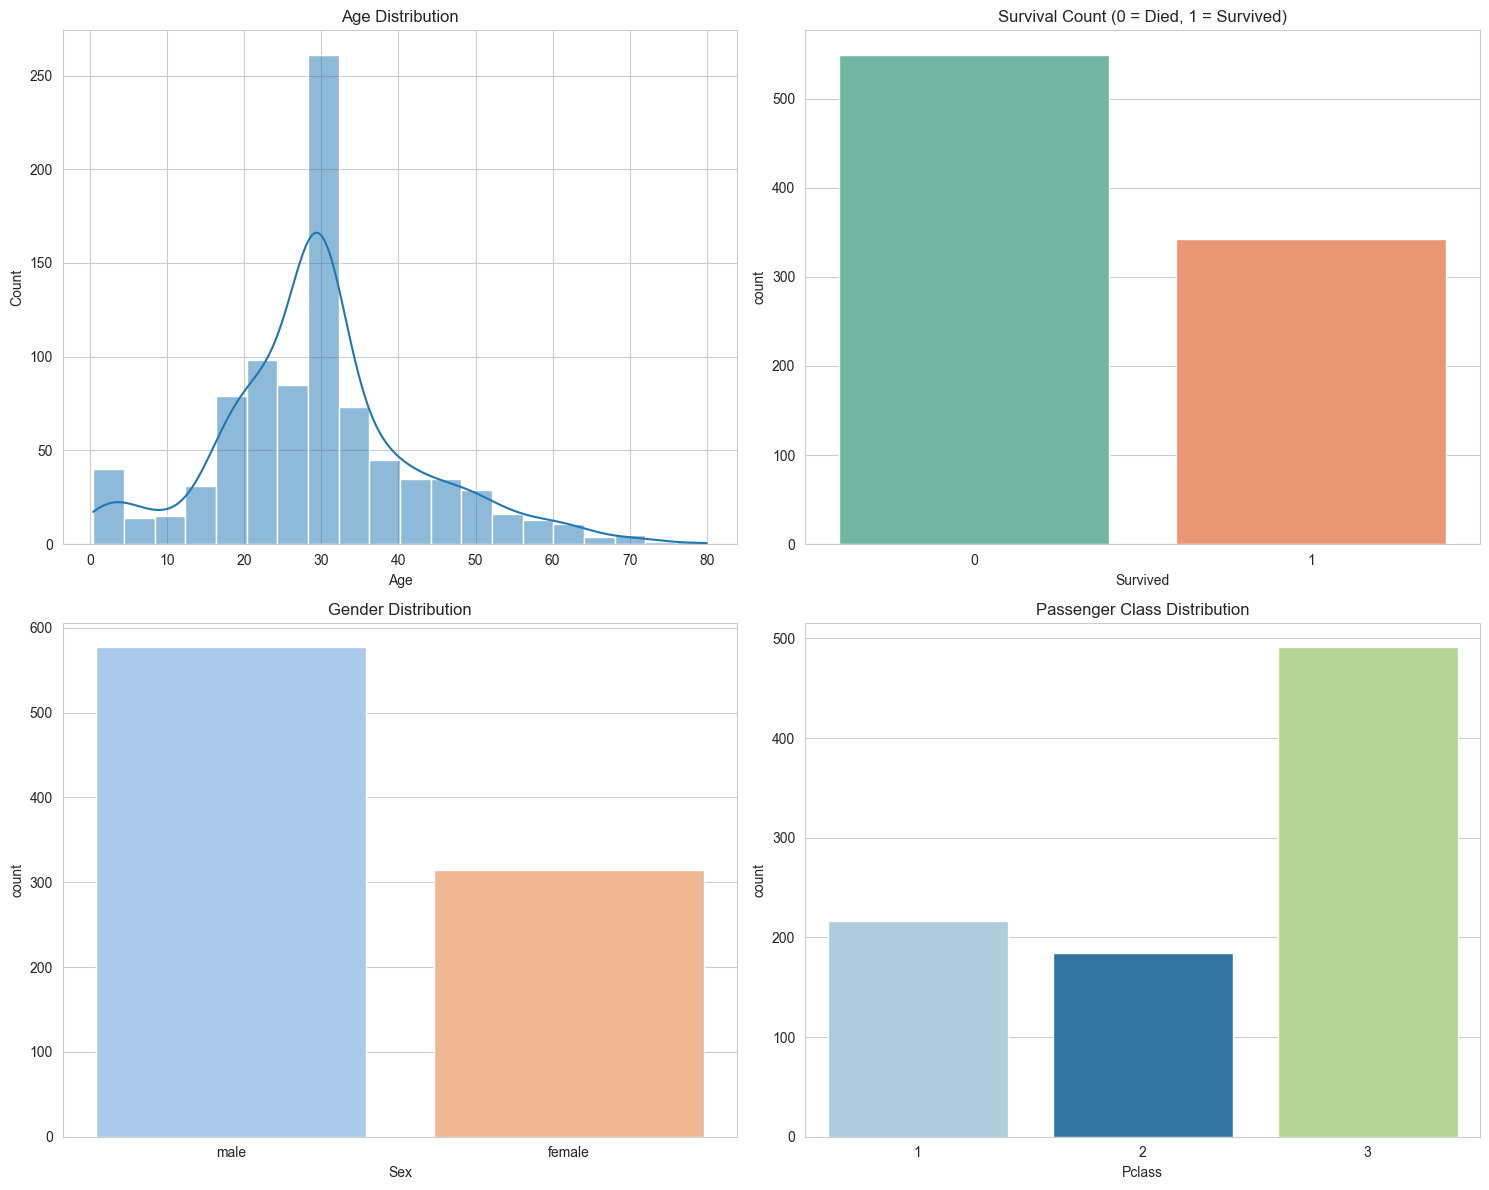

In [349]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
data=pd.read_csv(r"C:\Users\Diptanu Sarkar\Desktop\Python\Titanic-Dataset.csv")
data.Age=data.Age.fillna(data.Age.mean())
data['Cabin'] = data['Cabin'].fillna('NaN')
data['Embarked'] = data['Embarked'].fillna('S')
#data.head(20)
sns.set_style("whitegrid")
# plt.figure(figsize=(10,6))
fig, axes = plt.subplots(2, 2, figsize=(15, 12))  
# Creates a 2x2 grid of subplots (4 plots total) with figure size 15x12 inches 
#  
# | histplot = distribution of continuous values (like height, weight, age) with bins.
# | countplot = count of categories (like gender, survival) as bars.

# Histogram for Age distribution  
sns.histplot(  
    x="Age",          # Column to plot on X-axis  
    data=data,        # DataFrame to use  
    ax=axes[0,0],     # Plot on the first subplot (top-left corner)  
    bins=20,          # Split continuous age data into 20 intervals (bins)  
    kde=True          # Add a smooth density curve  
)  
axes[0,0].set_title("Age Distribution")  # Set the title of the subplot  

# Count plot for Survived column  
sns.countplot(  
    x="Survived",     # Category to count (0 or 1)  
    data=data,        # DataFrame to use  
    ax=axes[0,1],     # Plot on the second subplot (top-right corner)  
    palette='Set2'    # Use soft pastel-like colors from the Set2 palette  
)  
axes[0,1].set_title('Survival Count (0 = Died, 1 = Survived)')  # Set subplot title  

# Count plot for Gender distribution  
sns.countplot(  
    x="Sex",          # Category to count (Male/Female)  
    data=data,        # DataFrame to use  
    ax=axes[1,0],     # Plot on the third subplot (bottom-left corner)  
    palette="pastel"  # Use light pastel colors  
)  
axes[1,0].set_title('Gender Distribution')  # Set subplot title  

# Count plot for Passenger Class distribution  
sns.countplot(  
    x='Pclass',       # Category to count (Passenger class 1, 2, or 3)  
    data=data,        # DataFrame to use  
    ax=axes[1,1],     # Plot on the fourth subplot (bottom-right corner)  
    palette='Paired'  # Use paired contrasting colors  
)  
axes[1,1].set_title('Passenger Class Distribution')  # Set subplot title  

plt.tight_layout()  
# Automatically adjusts spacing between plots to prevent overlap  

plt.show()  
# Displays all the plots in one figure  


C:\Users\Diptanu Sarkar\AppData\Local\Temp\ipykernel_10868\2099768859.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=data, palette='Set3')


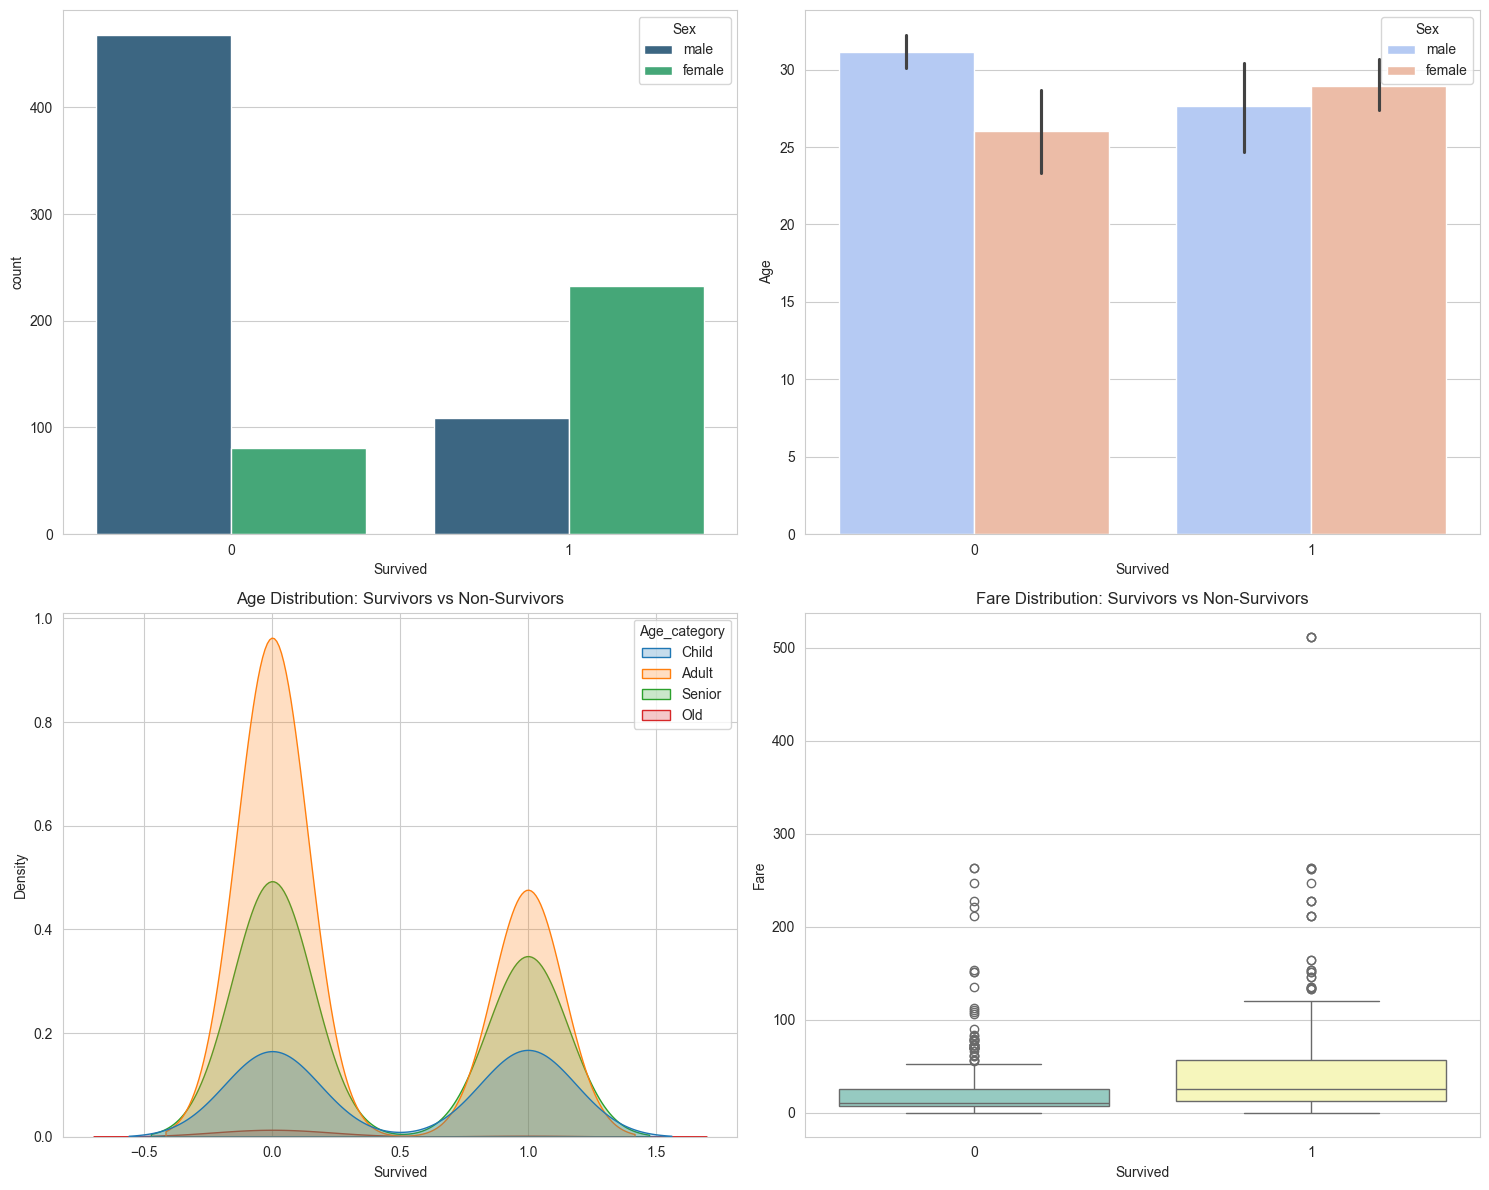

In [350]:
data["Age_category"]=pd.cut(data.Age, bins=[0, 18, 30, 65, np.inf], labels=["Child", "Adult", "Senior", "Old"])
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
sns.countplot(x="Survived",hue="Sex",data=data,palette="viridis")

plt.subplot(2,2,2)
sns.barplot(x="Survived",y="Age",hue="Sex",data=data,palette="coolwarm")

plt.subplot(2, 2, 3)
sns.kdeplot(x="Survived",hue="Age_category",data=data,fill=True)
# sns.kdeplot(data[data['Survived'] == 1]['Age'], label='Survived', shade=True)
# sns.kdeplot(data[data['Survived'] == 0]['Age'], label='Died', shade=True)
plt.title('Age Distribution: Survivors vs Non-Survivors')

plt.subplot(2, 2, 4)
sns.boxplot(x='Survived', y='Fare', data=data, palette='Set3')
plt.title('Fare Distribution: Survivors vs Non-Survivors')

plt.tight_layout()
plt.show()


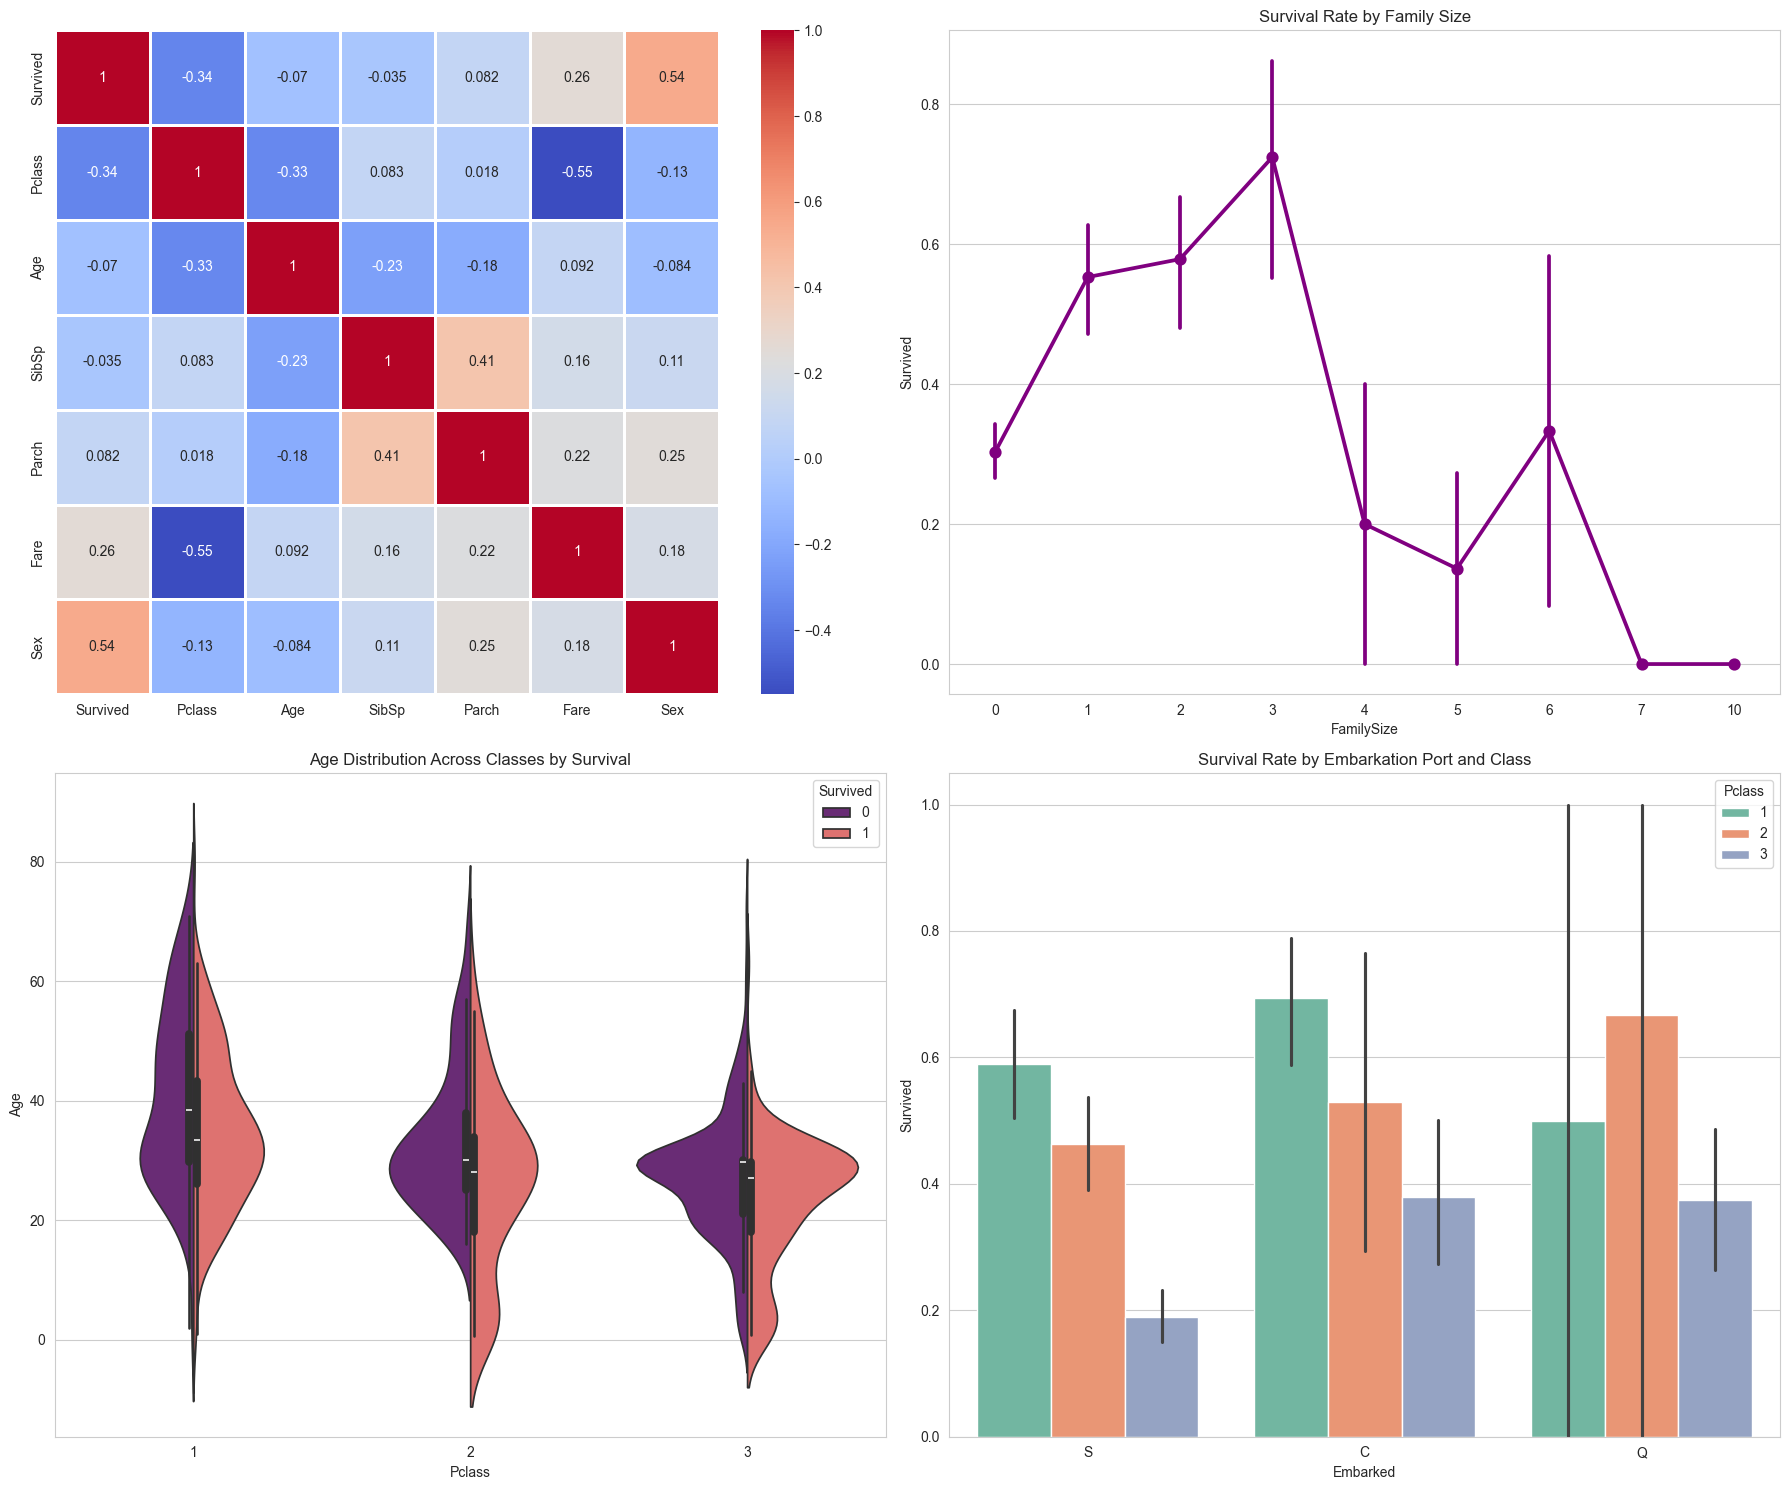

In [351]:
plt.figure(figsize=(18,15))
plt.subplot(2,2,1)
# Convert 'Sex' column to numeric (0 = male, 1 = female)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
corr=data[['Survived','Pclass','Age','SibSp','Parch','Fare','Sex']].corr()
# Use annot=True to show correlation values inside the heatmap.
sns.heatmap(corr,annot=True,linewidths=1,cmap='coolwarm')


# Family size impact
data['FamilySize'] = data['SibSp'] + data['Parch']
plt.subplot(2, 2, 2)
sns.pointplot(x='FamilySize', y='Survived', data=data, color='purple')
plt.title('Survival Rate by Family Size')

# Age distribution across classes
plt.subplot(2, 2, 3)
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=data, split=True, palette='magma')
plt.title('Age Distribution Across Classes by Survival')

# Embarkation analysis
plt.subplot(2, 2, 4)
sns.barplot(x='Embarked', y='Survived', hue='Pclass', data=data, palette='Set2')
plt.title('Survival Rate by Embarkation Port and Class')

plt.tight_layout()
plt.show()

C:\Users\Diptanu Sarkar\AppData\Local\Temp\ipykernel_10868\3742813229.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg=data.groupby("Age_cat")["Fare"].mean()


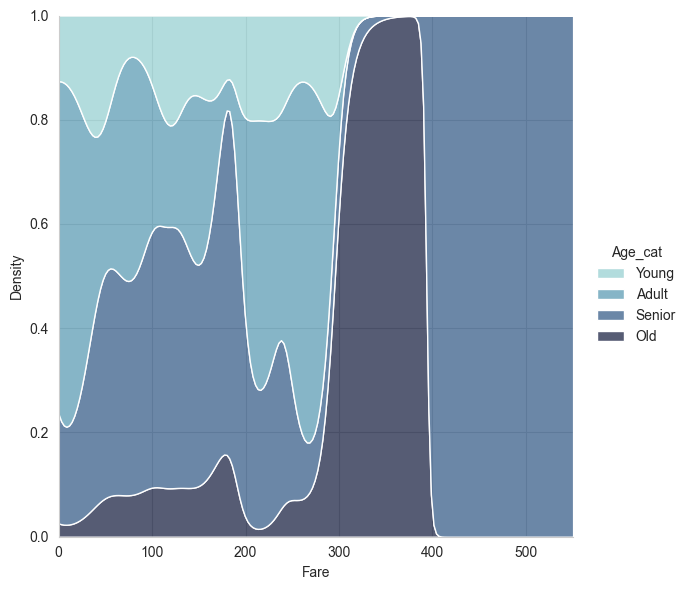

In [352]:
data["Age_cat"]=pd.cut(data.Age,bins=[0,18,30,55,100],labels=["Young","Adult","Senior","Old"])
avg=data.groupby("Age_cat")["Fare"].mean()
data["Fare_cat"] = data["Age_cat"].map(avg).astype(float)
data.head()
sns.displot(
    data=data,
    x="Fare", hue="Age_cat",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

C:\Users\Diptanu Sarkar\AppData\Local\Temp\ipykernel_10868\774703962.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Age_cat",y="Fare_cat",data=data,palette="Set2")


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category,FamilySize,Age_cat,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,1,Adult,25.187274
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Senior,1,Senior,41.850598
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,0,Adult,25.187274
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Senior,1,Senior,41.850598
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Senior,0,Senior,41.850598


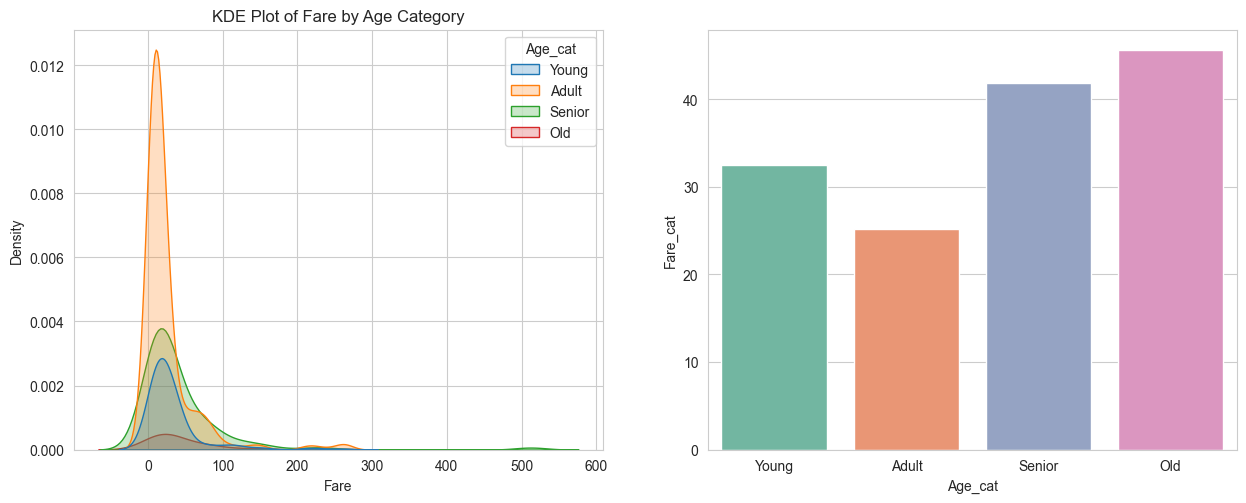

In [353]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
sns.kdeplot(data=data, x="Fare", hue="Age_cat", fill=True)
plt.title("KDE Plot of Fare by Age Category")
plt.subplot(2,2,2)
sns.barplot(x="Age_cat",y="Fare_cat",data=data,palette="Set2")
data.head()